# 💰 Monthly Expense Analysis


## **1. Import Libraries**

In [ ]:
import pandas as pd 


## **2. Load Bank Statement**

In [ ]:
df = pd.read_excel("Sparkasse.xlsx")

In [6]:
df.head()

,Buchungstag,Valutadatum,Buchungstext,Beguenstigter/Zahlungspflichtiger,Betrag
0,29.12.25,NaN,SONSTIGER EINZUG,NaN,-33.60
1,29.12.25,NaN,SONSTIGER EINZUG,NaN,-28.48
2,29.12.25,NaN,SONSTIGER EINZUG,NaN,-11.10
3,29.12.25,NaN,SONSTIGER EINZUG,NaN,-14.25
4,29.12.25,26.12.25,ECHTZEIT-UEBERWEISUNG,WESTERN UNION ONLINE LIMITED,-238.99


## **3. Clean Dates & Create Month Column**

In [7]:
df["Buchungstag"] = pd.to_datetime(df["Buchungstag"], dayfirst=True)


C:\Users\maleka\AppData\Local\Temp\ipykernel_8708\3607290532.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Buchungstag"] = pd.to_datetime(df["Buchungstag"], dayfirst=True)


In [8]:
df["Buchungstag"] = pd.to_datetime(
    df["Buchungstag"],
    format="%d.%m.%y",
    errors="coerce"
)


In [12]:
df[["Buchungstag", "Month"]].head()


,Buchungstag,Month
0,2025-12-29,2025-12
1,2025-12-29,2025-12
2,2025-12-29,2025-12
3,2025-12-29,2025-12
4,2025-12-29,2025-12


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Buchungstag                        205 non-null    datetime64[ns]
 1   Valutadatum                        201 non-null    object        
 2   Buchungstext                       205 non-null    object        
 3   Beguenstigter/Zahlungspflichtiger  197 non-null    object        
 4   Betrag                             205 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 8.1+ KB


In [11]:
df["Month"] = df["Buchungstag"].dt.to_period("M")



## **4. Expense Category Rules**

In [18]:
CATEGORY_RULES = {
    # Grocery
    "EDEKA": "Grocery",
    "REWE": "Grocery",
    "LIDL": "Grocery",
    "PENNY": "Grocery",
    "KAUFLAND": "Grocery",
    "CINAR": "Grocery",
    "MARKAB": "Grocery",
    "ALQUDS": "Grocery",

    # Bakery / Snacks
    "BACKWERK": "Bakery / Snacks",
    "DITSCH": "Bakery / Snacks",
    "BAECKEREI": "Bakery / Snacks",
    "EASTSIDE": "Bakery / Snacks",

    # Restaurants / Cafes
    "BARACHEL": "Restaurants / Cafes",
    "TAZA": "Restaurants / Cafes",
    "DAMASKUS": "Restaurants / Cafes",
    "LATakia": "Restaurants / Cafes",

    # Späti / Kiosk
    "SPATI": "Späti / Kiosk",

    # Clothing
    "NEW YORKER": "Clothing",
    "PRIMARK": "Clothing",
    "UNIQLO": "Clothing",
    "DEICHMANN": "Clothing",
    "WOOLWORTH": "Clothing",

    # Furniture / Home
    "IKEA": "Furniture / Home",
    "POCO": "Furniture / Home",
    "ROLLER": "Furniture / Home",
    "JYSK": "Furniture / Home",

    # Electronics
    "SATURN": "Electronics",

    # DIY
    "TOOM": "DIY / Hardware",

    # Online
    "AMAZON": "Amazon",
    "OTTO": "Online Shopping",

    # Payments
    "PAYPAL": "PayPal / Online Payments",
    "KLARNA": "PayPal / Online Payments",

    # Transport
    "DB VERTRIEB": "Public Transport",

    # Fixed costs
    "VODAFONE": "Internet / Phone",
    "PYUR": "Internet / Phone",
    "FREENET": "Internet / Phone",
    "VATTENFALL": "Electricity / Utilities",

    # Rent
    "WBF": "Rent",

    # Finance
    "BERLINER SPARKASSE": "Bank / Fees",
    "GA NR": "Cash Withdrawal",
    "WESTERN UNION": "Money Transfer",

    # Flowers
    "BLUME2000": "Flowers / Gifts"

    
}


## **5. Income Rules**

In [19]:
INCOME_RULES = {
    "THE MARCOM ENGINE": "Salary",
    "NEW YORKER": "Salary"
}


## **6. Categorization Logic**

In [20]:
def categorize_transaction(row):
    text = row["Beguenstigter/Zahlungspflichtiger"]
    amount = row["Betrag"]

    # 1️⃣ Income first
    if amount > 0:
        if pd.notna(text):
            text_upper = text.upper()
            for keyword, category in INCOME_RULES.items():
                if keyword in text_upper:
                    return category
        return "Other Income"

    # 2️⃣ Expenses
    if pd.isna(text):
        return "Bank / Internal"

    text_upper = text.upper()

    for keyword, category in CATEGORY_RULES.items():
        if keyword in text_upper:
            return category

    return "Other Expense"


In [21]:
df["Category"] = df.apply(categorize_transaction, axis=1)



In [22]:
df[[
    "Buchungstag",
    "Beguenstigter/Zahlungspflichtiger",
    "Betrag",
    "Category"
]].head(15)


,Buchungstag,Beguenstigter/Zahlungspflichtiger,Betrag,Category
0,2025-12-29,NaN,-33.60,Bank / Internal
1,2025-12-29,NaN,-28.48,Bank / Internal
2,2025-12-29,NaN,-11.10,Bank / Internal
3,2025-12-29,NaN,-14.25,Bank / Internal
4,2025-12-29,WESTERN UNION ONLINE LIMITED,-238.99,Money Transfer
5,2025-12-23,LS Sammys Berliner Don/Frankfurter Allee 111a/...,-9.30,Other Expense
6,2025-12-23,Cinar Mini Market/Frankfurter Allee 92/Berlin/DEU,-5.15,Grocery
7,2025-12-23,PayPal Europe S.a.r.l. et Cie S.C.A ...,-56.00,PayPal / Online Payments
8,2025-12-23,JYSK SE,-12.00,Furniture / Home
9,2025-12-22,"EDEKA THAUT, BERLIN//BERLIN/DE",-3.49,Grocery


## **7. Monthly Summary**

In [24]:
monthly_summary = (
    df.groupby(["Month", "Category"])["Betrag"]
      .sum()
      .reset_index()
      .sort_values(["Month", "Betrag"])
)



In [25]:
display(
    monthly_summary
        .sort_values(["Month", "Betrag"], ascending=[True, True])
)


,Month,Category,Betrag
16,2025-11,Rent,-800.75
0,2025-11,Amazon,-732.53
8,2025-11,Furniture / Home,-597.82
2,2025-11,Bank / Fees,-325.77
9,2025-11,Grocery,-299.33
11,2025-11,Money Transfer,-238.99
14,2025-11,PayPal / Online Payments,-145.69
12,2025-11,Other Expense,-98.45
10,2025-11,Internet / Phone,-69.04
6,2025-11,Electricity / Utilities,-67.00


## **8. Visualization 1: Category spending (bar chart)** 

In [28]:
df["Month"] = df["Month"].astype(str)


In [44]:
import os

os.makedirs("exports", exist_ok=True)


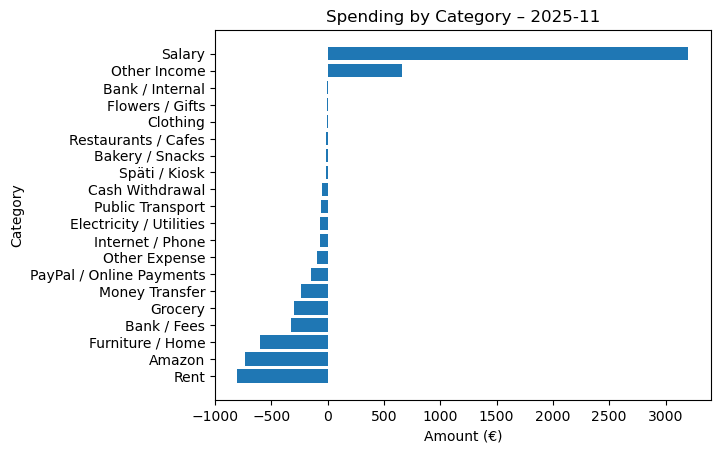

In [45]:
# Pick one month to visualize
month_to_plot = "2025-11"

plot_df = (
    monthly_summary[monthly_summary["Month"] == month_to_plot]
    .sort_values("Betrag")
)

plt.figure()
plt.barh(plot_df["Category"], plot_df["Betrag"])
plt.title(f"Spending by Category – {month_to_plot}")
plt.xlabel("Amount (€)")
plt.ylabel("Category")

# ✅ CREATE FOLDER FIRST
import os
os.makedirs("exports", exist_ok=True)

# ✅ SAVE IMAGE
plt.savefig(
    f"exports/spending_by_category_{month_to_plot}.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()


## **9. Visualization 2: Income vs Expense trend**

In [30]:
monthly_overview = (
    df.groupby("Month")["Betrag"]
      .agg(
          Income=lambda x: x[x > 0].sum(),
          Expense=lambda x: x[x < 0].sum(),
          Net=lambda x: x.sum()
      )
      .reset_index()
)

monthly_overview



,Month,Income,Expense,Net
0,2025-11,3867.01,-3551.08,315.93
1,2025-12,3665.81,-5083.74,-1417.93


## **10. Visualization 3: Expense_Breakdown**

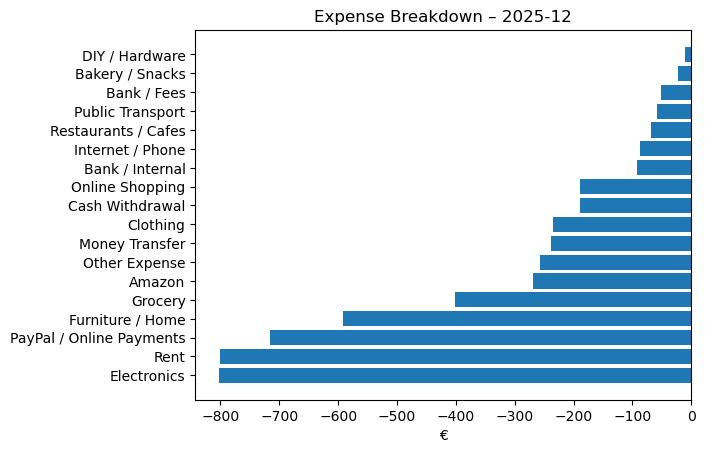

In [47]:
latest_month = monthly_summary["Month"].max()

expense_breakdown = (
    monthly_summary[
        (monthly_summary["Month"] == latest_month) &
        (monthly_summary["Betrag"] < 0)
    ]
    .sort_values("Betrag")
)

plt.figure()
plt.barh(expense_breakdown["Category"], expense_breakdown["Betrag"])
plt.title(f"Expense Breakdown – {latest_month}")
plt.xlabel("€")

# make sure exports folder exists
import os
os.makedirs("exports", exist_ok=True)

# save image BEFORE show
plt.savefig(
    f"exports/expense_breakdown_{latest_month}.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()


## 11. **Export to Excel**

In [46]:
with pd.ExcelWriter("exports/Sparkasse_Monthly_Report.xlsx") as writer:
    
    monthly_summary.to_excel(
        writer,
        sheet_name="Category Summary",
        index=False
    )
    
    monthly_overview.to_excel(
        writer,
        sheet_name="Income_Expense_Net",
        index=False
    )
    
    df.to_excel(
        writer,
        sheet_name="All Transactions",
        index=False
    )


In [49]:
print("✅ monthly automation finished successfully")


✅ monthly automation finished successfully
